In [13]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
%load_ext autoreload
%autoreload 2
from helper import draw_dot

class Value:
    def __init__(self, data, _children=(), _op='', label='') -> None:
        self.data = data
        self.grad = 0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label
    
    def __repr__(self) -> str:
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, _children=(self, other), _op='+')
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
            # self._backward()
            # other._backward()
        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, _children=(self, other), _op='*')
        def _backward():
            self.grad += out.grad * other.data
            other.grad += out.grad * self.data
            # self._backward()
            # other._backward()
        out._backward = _backward
        return out
    
    def tanh(self): 
        ex = math.exp(2*self.data)
        out = Value((ex - 1)/(ex + 1), _children=(self,), _op='tanh')
        def _backward(): 
            self.grad += (1 - out.data ** 2) * out.grad
            # self._backward()
        out._backward = _backward
        return out
    
    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
            return
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w1
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
b = Value(6.88137, label='b')

w1x1 = w1 * x1; w1x1.label = "w1*x1"
w2x2 = w2 * x2; w2x2.label = "w2*x2"
w1x1w2x2 = w1x1 + w2x2; w1x1w2x2.label = "w1*x1 + w2*x2"
z = w1x1w2x2 + b; z.label = "z"
a = z.tanh(); a.label = "a"

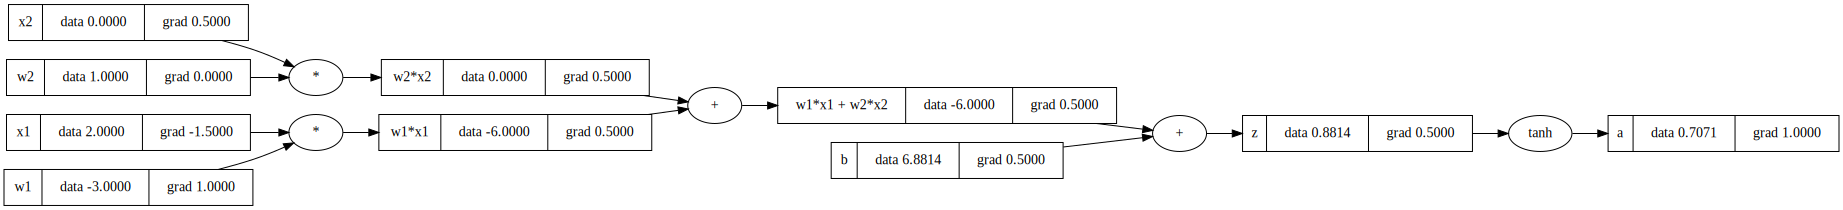

In [16]:
a.backward()
draw_dot(a)